# Regressão Logística I
## Tarefa II

Vamos trabalhar com a mesma base do exercício anterior, mas vamos aprofundar um pouco mais a nossa regressão.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import statsmodels.formula.api as smf

In [2]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data'

df = pd.read_csv(url, 
                 names=['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
                        'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'])
df['flag_doente'] = (df['num']!=0).astype('int64')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,flag_doente
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0,0


A descrição das variáveis está recortada abaixo:
- age: idade do paciente em anos
- sex: sexo (1 = male; 0 = female)  
- cp: tipo de dor no peito
  - 1: angina típica
  - 2: angina atípica
  - 3: dor não-angina
  - 4: assintomático
- trestbps: pressão sanguínea em repouso (em mm Hg na admissão ao hospital
- chol: colesterol sérico em mg/dl
- fbs: (açúcar no sangue em jejum > 120 mg/dl) (1 = True; 0 = False)
- restecg: resultados eletrocardiográficos em repouso
  - 0: normal
  - 1: tendo anormalidade da onda ST-T (Inversões de onda T e / ou ST com elevação ou depressão de > 0.05 mV)
  - 2: mostrando hipertrofia ventricular esquerda provável ou definitiva pelos critérios de Estes
- thalach: frequência cardíaca máxima alcançada
- exang: angina induzida por exercício(1 = sim; 0 = não)
- oldpeak = Depressão de ST induzida por exercício em relação ao repouso
- slope: Depressão de ST induzida por exercício em relação ao repouso
  - 1: inclinação ascendente
  - 2: estável
  - 3: inclinação descendente
- ca: número de vasos principais (0-3) coloridos por fluorosopia
- thal: 3 = normal; 6 = defeito corrigido; 7 = defeito reversível
- num: diagnóstico de doença cardíaga (status de doença angiográfica)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          303 non-null    float64
 1   sex          303 non-null    float64
 2   cp           303 non-null    float64
 3   trestbps     303 non-null    float64
 4   chol         303 non-null    float64
 5   fbs          303 non-null    float64
 6   restecg      303 non-null    float64
 7   thalach      303 non-null    float64
 8   exang        303 non-null    float64
 9   oldpeak      303 non-null    float64
 10  slope        303 non-null    float64
 11  ca           303 non-null    object 
 12  thal         303 non-null    object 
 13  num          303 non-null    int64  
 14  flag_doente  303 non-null    int64  
dtypes: float64(11), int64(2), object(2)
memory usage: 35.6+ KB


1. Considere o script que monta a análise bivariada que você fez na tarefa anterior. Transforme esse script em uma função, que deve:
- Ter como parâmetros de entrada:
    - Um *dataframe* contendo os dados a serem avaliados
    - Um *string* contendo o nome da variável resposta
    - Um *string* contendo o nome da variável explicativa
- E deve retornar um *dataframe* com os dados da bivariada. 
**Monte** a mesma bivariada pelo menos três variáveis qualitativas do *data-frame*. Qual delas parece discriminar mais o risco?

In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,flag_doente
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0,0


In [5]:
def script_analise_biv(nome_data, resposta, explicativa):
    nome_data = pd.crosstab(df[resposta], df[explicativa], margins=True)
    nome_data["Media_de_doentes"] = nome_data[1]/nome_data["All"]
    nome_data["chance"] = nome_data[1]/nome_data[0]
    nome_data.loc["All", "chance"]
    nome_data["RC_vs_All"] = nome_data["chance"]/nome_data.loc["All", "chance"]
    return nome_data

In [6]:
novo_data = script_analise_biv("primeiro", "sex", "flag_doente")
novo_data

flag_doente,0,1,All,Media_de_doentes,chance,RC_vs_All
sex,,,,,,
0.0,72,25,97,0.257732,0.347222,0.409672
1.0,92,114,206,0.553398,1.239130,1.461996
All,164,139,303,0.458746,0.847561,1.000000


In [7]:
novo_data1 = script_analise_biv("segundo", "slope", "flag_doente")
novo_data1

flag_doente,0,1,All,Media_de_doentes,chance,RC_vs_All
slope,,,,,,
1.0,106,36,142,0.253521,0.339623,0.400706
2.0,49,91,140,0.650000,1.857143,2.191161
3.0,9,12,21,0.571429,1.333333,1.573141
All,164,139,303,0.458746,0.847561,1.000000


In [8]:
novo_data2 = script_analise_biv("terceiro", "cp", "flag_doente")
novo_data2

flag_doente,0,1,All,Media_de_doentes,chance,RC_vs_All
cp,,,,,,
1.0,16,7,23,0.304348,0.437500,0.516187
2.0,41,9,50,0.180000,0.219512,0.258993
3.0,68,18,86,0.209302,0.264706,0.312315
4.0,39,105,144,0.729167,2.692308,3.176536
All,164,139,303,0.458746,0.847561,1.000000


2. Monte uma função semelhante para categorizar variáveis quantitativas contínuas (com muitas categorias) como ```age```.  
    Além dos mesmos parâmetros da função anterior, defina mais um parâmetro como número de categorias que você deseja quebrar. Defina um valor '*default*' de 5 grupos para este parâmetro.  

In [9]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,flag_doente
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0,0


In [10]:
def analiseBivariadaQuant(df: pd.DataFrame, variavel_resposta: str, variavel_explicativa: str, n_bins=5) -> pd.DataFrame :

    # Criando uma nova coluna no DataFrame contendo os grupos de variável explicativa com base nos quantis
    df[f'{variavel_explicativa}_grupo'] = pd.qcut(df[variavel_explicativa], q=n_bins)
    # Contando a quantidade de observações em cada grupo
    df[f'{variavel_explicativa}_grupo'].value_counts()

    # Tabela de contingência entre os grupos da variável explicativa e a variável resposta,
    ana_biv = pd.crosstab(df[f'{variavel_explicativa}_grupo'], df[variavel_resposta], margins=True, margins_name='Total')
    # Renomeia as colunas da tabela
    ana_biv.columns = ['cat1', 'cat2', 'Total']
    print(f'Quantidade média de "{variavel_explicativa}":', df[variavel_explicativa].mean())


    # Análises
    # Calculado a média da variável resposta 
    ana_biv[f'media_{variavel_resposta}_por_{variavel_explicativa}'] = ana_biv['cat2'] / ana_biv['Total']
    # Calculando a razão de chances (odds)
    ana_biv['Odds'] = ana_biv['cat2'] / ana_biv['cat1']
    ana_biv['Odds ratio'] = ana_biv['Odds'] / ana_biv.loc[ana_biv.index[0], 'Odds']
    ana_biv['Log (Odds)'] = np.log(ana_biv['Odds'])
    # Calculando o log do odds ratio para cada grupo da variável explicativa
    ana_biv['Log (Odds ratio)'] = np.log(ana_biv['Odds ratio'])
    
    return ana_biv



In [13]:
analiseBivariadaQuant(df, "flag_doente", "age")

Quantidade média de "age": 54.43894389438944


,cat1,cat2,Total,media_flag_doente_por_age,Odds,Odds ratio,Log (Odds),Log (Odds ratio)
age_grupo,,,,,,,,
"(28.999, 45.0]",47,16,63,0.253968,0.340426,1.000000,-1.077559,0.000000
"(45.0, 53.0]",42,22,64,0.343750,0.523810,1.538690,-0.646627,0.430932
"(53.0, 58.0]",32,39,71,0.549296,1.218750,3.580078,0.197826,1.275385
"(58.0, 62.0]",13,32,45,0.711111,2.461538,7.230769,0.900787,1.978345
"(62.0, 77.0]",30,30,60,0.500000,1.000000,2.937500,0.000000,1.077559
Total,164,139,303,0.458746,0.847561,2.489710,-0.165392,0.912166


3. Construa um modelo de regressão logística com as variáveis qualitativas: ```sex + cp +  trestbps``` e com a variável quantitativa ```age```.

**Interprete os parâmetros.**

In [11]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,flag_doente
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0,0


In [20]:
import statsmodels.formula.api as sm

In [14]:
reglog = smf.logit(" flag_doente ~ C(sex) + C(cp, Treatment(4)) + trestbps + age"
                   , data=df).fit()

reglog.summary()

Optimization terminated successfully.
         Current function value: 0.476154
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            flag_doente   No. Observations:                  303
Model:                          Logit   Df Residuals:                      296
Method:                           MLE   Df Model:                            6
Date:                Tue, 26 Mar 2024   Pseudo R-squ.:                  0.3097
Time:                        13:10:20   Log-Likelihood:                -144.27
converged:                       True   LL-Null:                       -208.99
Covariance Type:            nonrobust   LLR p-value:                 1.692e-25
==============================================================================================
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                     -5.8619      1.413     -4.147      0.000      -8.632      -3.092
C(sex)[T.1.0]                  1.8094      0.353      5.130      0.000       1.118       2.501
C(cp, Treatment(4))[T.1.0]    -2.4789      0.553     -4.485      0.000      -3.562      -1.396
C(cp, Treatment(4))[T.2.0]    -2.5406      0.452     -5.622      0.000      -3.426      -1.655
C(cp, Treatment(4))[T.3.0]    -2.4074      0.360     -6.690      0.000      -3.113      -1.702
trestbps                       0.0193      0.009      2.261      0.024       0.003       0.036
age                            0.0567      0.018      3.120      0.002       0.021       0.092
==============================================================================================
"""

4. Avalie o seu modelo quanto a **calibragem**:
- Calcule a probabilidade de evento predita segundo o seu modelo
- Categorize essa probabilidade em G=5 grupos
- Calcule a probabilidade de evento predita média por grupo
- Calcule a taxa de eventos (média da variável indicadora de eventos) por grupo
- Compare graficamente o valor eperado versus observado para a taxa de maus por grupo

In [16]:
df["predito"] = reglog.predict(df)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,flag_doente,age_grupo,predito
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0,0,"(62.0, 77.0]",0.458229
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2,1,"(62.0, 77.0]",0.944123
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1,1,"(62.0, 77.0]",0.886566
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0,0,"(28.999, 45.0]",0.134929
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0,0,"(28.999, 45.0]",0.027278


In [22]:
cat_pred = pd.qcut(df['predito'], 5, duplicates='drop')
cat_pred.value_counts().sort_index()

predito
(0.0131, 0.143]    62
(0.143, 0.287]     59
(0.287, 0.586]     62
(0.586, 0.822]     59
(0.822, 0.944]     61
Name: count, dtype: int64

In [23]:
group_reg = df.groupby(cat_pred)
qualid = group_reg[['age']].count().rename(columns = {'age': 'idade'})
qualid

C:\Users\victo\AppData\Local\Temp\ipykernel_55012\1968426014.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group_reg = df.groupby(cat_pred)


,idade
predito,
"(0.0131, 0.143]",62
"(0.143, 0.287]",59
"(0.287, 0.586]",62
"(0.586, 0.822]",59
"(0.822, 0.944]",61


In [24]:
qualid['predito'] = group_reg['predito'].mean()
qualid

,idade,predito
predito,,
"(0.0131, 0.143]",62,0.072008
"(0.143, 0.287]",59,0.209626
"(0.287, 0.586]",62,0.435175
"(0.586, 0.822]",59,0.708861
"(0.822, 0.944]",61,0.874819


In [25]:
qualid['sexo'] = group_reg['sex'].mean()
qualid

,idade,predito,sexo
predito,,,
"(0.0131, 0.143]",62,0.072008,0.209677
"(0.143, 0.287]",59,0.209626,0.830508
"(0.287, 0.586]",62,0.435175,0.596774
"(0.586, 0.822]",59,0.708861,0.779661
"(0.822, 0.944]",61,0.874819,1.000000


In [33]:
qualid['flag_doente'] = group_reg['flag_doente'].mean()
qualid

,idade,predito,sexo,flag_doente
predito,,,,
"(0.0131, 0.143]",62,0.072008,0.209677,0.080645
"(0.143, 0.287]",59,0.209626,0.830508,0.152542
"(0.287, 0.586]",62,0.435175,0.596774,0.483871
"(0.586, 0.822]",59,0.708861,0.779661,0.762712
"(0.822, 0.944]",61,0.874819,1.000000,0.819672


Text(0.5, 0, 'Grupo')

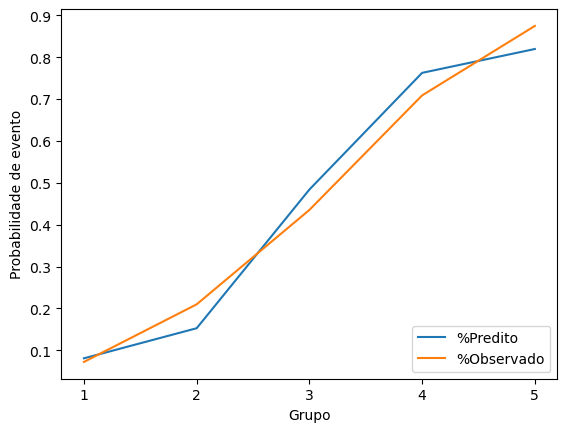

In [34]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

ax = qualid["flag_doente"].plot(label='%Predito')
ax = qualid['predito'].plot(label='%Observado')

ticks = ax.set_xticks([0, 1, 2, 3, 4])
labels = ax.set_xticklabels([1, 2, 3, 4, 5])
ax.legend(loc="lower right")
ax.set_ylabel('Probabilidade de evento')
ax.set_xlabel('Grupo')

Text(0.5, 0, 'Grupo')

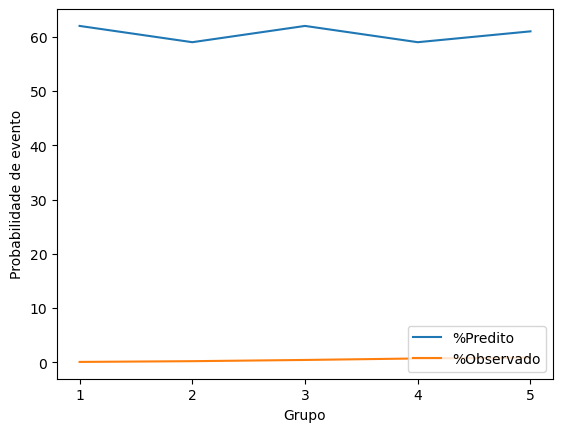

In [32]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

ax = qualid['idade'].plot(label='%Predito')
ax = qualid['predito'].plot(label='%Observado')

ticks = ax.set_xticks([0, 1, 2, 3, 4])
labels = ax.set_xticklabels([1, 2, 3, 4, 5])
ax.legend(loc="lower right")
ax.set_ylabel('Probabilidade de evento')
ax.set_xlabel('Grupo')

Text(0.5, 0, 'Grupo')

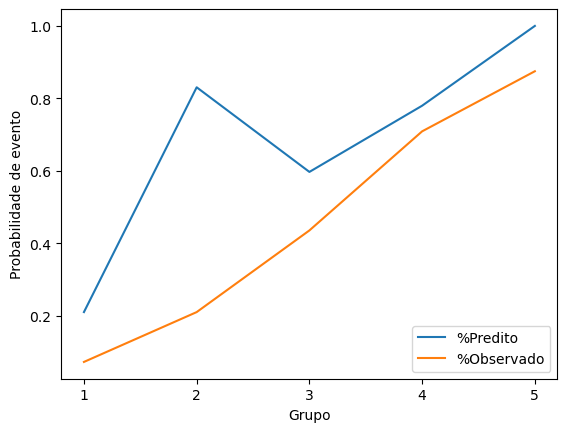

In [27]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

ax = qualid['idade'].plot(label='%Predito')
ax = qualid['predito'].plot(label='%Observado')

ticks = ax.set_xticks([0, 1, 2, 3, 4])
labels = ax.set_xticklabels([1, 2, 3, 4, 5])
ax.legend(loc="lower right")
ax.set_ylabel('Probabilidade de evento')
ax.set_xlabel('Grupo')

5. Avalie o seu modelo quanto a discriminação calculando acurácia, GINI e KS.

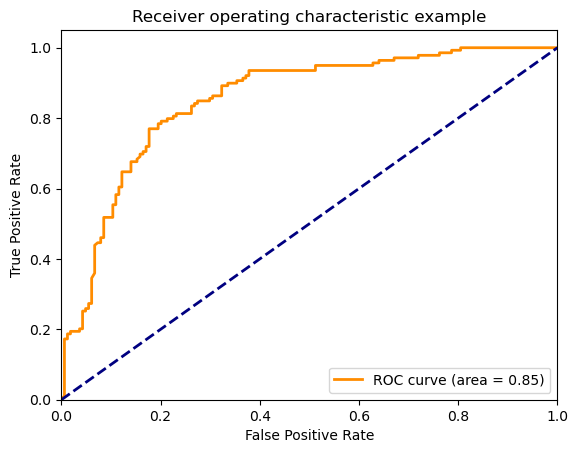

In [35]:
from sklearn.metrics import roc_curve
from sklearn import metrics

fpr, tpr, thresholds = metrics.roc_curve(df['flag_doente'], df['predito'])

plt.figure()
lw = 2

fpr, tpr, thresholds = metrics.roc_curve(df['flag_doente'], df['predito'])
auc_ = metrics.auc(fpr, tpr)
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % auc_)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()



Text(0, 0.5, 'Função Distribuição Acumulada')

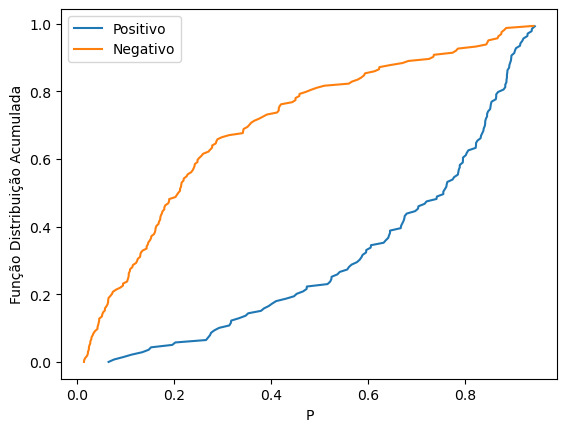

In [40]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

score_pop1 = df.loc[df['flag_doente']==1,'predito']
ax.plot(np.sort(score_pop1), np.linspace(0, 1, len(score_pop1), endpoint=False), label='Positivo')

score_pop2 = df.loc[df['flag_doente']!=1,'predito']
ax.plot(np.sort(score_pop2), np.linspace(0, 1, len(score_pop2), endpoint=False), label='Negativo')
ax.legend()

ax.set_xlabel('P')
ax.set_ylabel('Função Distribuição Acumulada')

In [41]:
from sklearn import metrics
from scipy.stats import ks_2samp

acc = metrics.accuracy_score(df['flag_doente'], df['predito']>.5)
print('Acurácia: {0:.2f}%'.format(acc*100))

#AUC
fpr, tpr, thresholds = metrics.roc_curve(df['flag_doente'], df['predito'])
auc_ = metrics.auc(fpr, tpr)
#Gini
gini = 2*auc_ -1
#KS
ks = ks_2samp(df.loc[df['flag_doente'] == 1, 'predito'], df.loc[df['flag_doente'] != 1, 'predito']).statistic

print('KS: {0:.2f}% \nAUC: {1:.2f}% \nGINI: {2:.2f}%'
      .format(ks*100, auc_*100, gini*100))

Acurácia: 79.54%
KS: 59.30% 
AUC: 85.19% 
GINI: 70.39%


6. tente melhorar o modelo obtido, por exemplo inserindo ou removendo variáveis.  
    Avalie as características do seu modelo (calibragem e acurácia).

In [51]:
cat_pred1 = pd.qcut(df['predito'], 5, duplicates='drop')
cat_pred1.value_counts().sort_index()

predito
(0.0131, 0.143]    62
(0.143, 0.287]     59
(0.287, 0.586]     62
(0.586, 0.822]     59
(0.822, 0.944]     61
Name: count, dtype: int64

In [52]:
group_reg = df.groupby(cat_pred)
qualid1 = group_reg[['flag_doente']].count().rename(columns = {'flag_doente': 'doente'})
qualid1

C:\Users\victo\AppData\Local\Temp\ipykernel_55012\2580429153.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group_reg = df.groupby(cat_pred)


,doente
predito,
"(0.0131, 0.143]",62
"(0.143, 0.287]",59
"(0.287, 0.586]",62
"(0.586, 0.822]",59
"(0.822, 0.944]",61


In [54]:
qualid1['predito'] = group_reg['predito'].mean()
qualid1

,doente,predito
predito,,
"(0.0131, 0.143]",62,0.072008
"(0.143, 0.287]",59,0.209626
"(0.287, 0.586]",62,0.435175
"(0.586, 0.822]",59,0.708861
"(0.822, 0.944]",61,0.874819


Text(0.5, 0, 'Grupo')

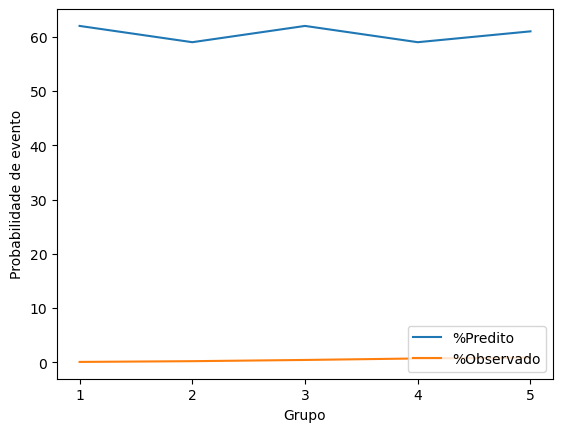

In [55]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

ax = qualid1['doente'].plot(label='%Predito')
ax = qualid1['predito'].plot(label='%Observado')

ticks = ax.set_xticks([0, 1, 2, 3, 4])
labels = ax.set_xticklabels([1, 2, 3, 4, 5])
ax.legend(loc="lower right")
ax.set_ylabel('Probabilidade de evento')
ax.set_xlabel('Grupo')

In [57]:
from sklearn.metrics import roc_curve
from sklearn import metrics

fpr, tpr, thresholds = metrics.roc_curve(qualid1['doente'], qualid1['predito'])

plt.figure()
lw = 2

fpr, tpr, thresholds = metrics.roc_curve(qualid1['doente'], qualid1['predito'])
auc_ = metrics.auc(fpr, tpr)
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % auc_)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()


ValueError: multiclass format is not supported